# Table of Contents
 <p><div class="lev1"><a href="#Seaborn---Statistical-Data-Visualization"><span class="toc-item-num">1 - </span><a href="http://stanford.edu/~mwaskom/software/seaborn/" target="_blank">Seaborn</a> - Statistical Data Visualization</a></div><div class="lev2"><a href="#Major-plot-types"><span class="toc-item-num">1.1 - </span>Major plot types</a></div><div class="lev3"><a href="#Distribution-plots"><span class="toc-item-num">1.1.1 - </span>Distribution plots</a></div><div class="lev4"><a href="#pairplot"><span class="toc-item-num">1.1.1.1 - </span><a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot" target="_blank">pairplot</a></a></div><div class="lev4"><a href="#jointplot"><span class="toc-item-num">1.1.1.2 - </span><a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot" target="_blank">jointplot</a></a></div><div class="lev3"><a href="#Regression-plots"><span class="toc-item-num">1.1.2 - </span>Regression plots</a></div><div class="lev4"><a href="#lmplot"><span class="toc-item-num">1.1.2.1 - </span><a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html#seaborn.lmplot" target="_blank">lmplot</a></a></div><div class="lev3"><a href="#Categorical-plots"><span class="toc-item-num">1.1.3 - </span>Categorical plots</a></div><div class="lev4"><a href="#factorplot"><span class="toc-item-num">1.1.3.1 - </span><a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot" target="_blank">factorplot</a></a></div><div class="lev3"><a href="#Matrix-plots"><span class="toc-item-num">1.1.4 - </span>Matrix plots</a></div><div class="lev4"><a href="#clustermap"><span class="toc-item-num">1.1.4.1 - </span><a href="http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.clustermap.html#seaborn.clustermap" target="_blank">clustermap</a></a></div><div class="lev2"><a href="#Color-Palettes"><span class="toc-item-num">1.2 - </span>Color Palettes</a></div><div class="lev4"><a href="#sns.set_palette"><span class="toc-item-num">1.2.0.1 - </span><code>sns.set_palette</code></a></div><div class="lev4"><a href="#sns.color_palette"><span class="toc-item-num">1.2.0.2 - </span><code>sns.color_palette</code></a></div>

> Usual stuff to import and set

In [1]:
import seaborn as sns
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
sns.set_context("notebook", font_scale=1.25)
sns.set_style("ticks", {"font.family": "Liberation Sans"})

# [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) - Statistical Data Visualization

- If you're a `matplotlib` pro, you probably know how to do everything that `seaborn` does. Only the fact that matplotlib is just so insanely detailed and low level with myriad of options, ***it always is difficult to appreciate how powerful `matplotlib` really is***
- Behold `seaborn`, a `Python` package for high level statistical plotting. Before coming across seaborn, I always went back to `ggplot2` for my extensive plotting needs but no more `R` or `ggplot2` as I have found my safe haven
- **I cannot do justice to seaborn by writing about its functions and plots here. The documentation is just done so beautifully, you can't miss anything**
- Remember [xkcd color survey](https://xkcd.com/color/rgb/), yes they are baked in seaborn to choose from

How am I planning to cover seaborn?
- There are two major plot types that seaborn does (1. FacetGrid 2. Matplotlib axes). Not every seaborn object returned is a matplotlib axes object but it's mostly grid of multiple matplotlib axes. 
- Seaborn does one major FacetGrid type plot for every plot type where it has the option to choose the kind of plot. I'll be covering these major FacetGrid type plots which will encompass different plots inside them.

## Major plot types

Again, this section is from [API reference](http://stanford.edu/~mwaskom/software/seaborn/api.html). I've listed subplots based on what I am going to cover today. 

### Distribution plots

#### [pairplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

- This is scatter matrix visualization made very easy.

`sns.pairplot(df)`

Some parameters:

- `kind`: `{'scatter', 'reg'}`
- `diag_kind`: `{'hist', 'kde'}`
- `hue` : Select column to apply color by

In [2]:
iris = pd.read_csv("iris.csv", index_col=0)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


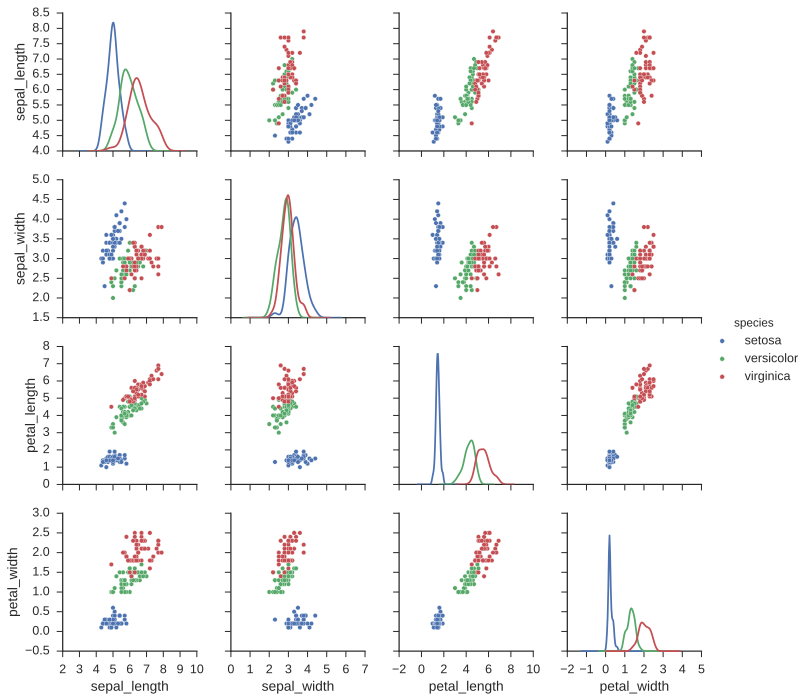

In [3]:
g = sns.pairplot(iris, hue="species", diag_kind="kde")

#### [jointplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot)

- Scatterplot on steriods. Provides variants like hexagonal bins, density estimates apart from scatter. Provides linear regression plots with annotation.  Mix and match ;)

`sns.jointplot(data=df, x="", y="")`

Some parameters:

- `kind` : `{ “scatter” | “reg” | “resid” | “kde” | “hex” }`, optional
  - This is the one you change if you want a different plot

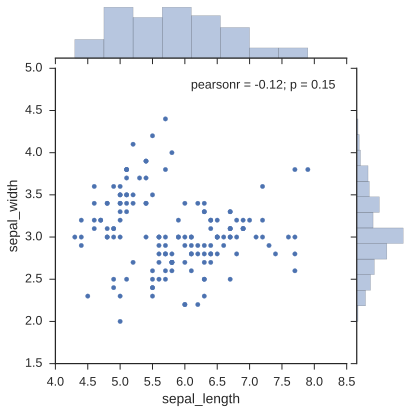

In [4]:
g = sns.jointplot(data=iris, x="sepal_length", y="sepal_width")

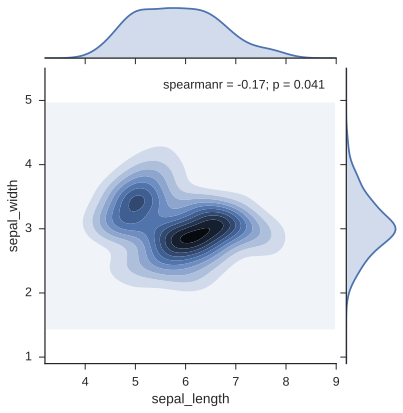

In [5]:
from scipy.stats import spearmanr
g = sns.jointplot(data=iris, x="sepal_length", y="sepal_width",
                 kind="kde", stat_func=spearmanr)

### Regression plots

#### [lmplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html#seaborn.lmplot)

This is a grid plot to fit regression across subsets of dataset

`sns.lmplot(data=df, x="", y="")`

Some parameters:

- `col` - Separately plot forming different columns of plot based on this column
- `row` - Separately plot forming different rows of plot based on this column
- `fit_reg` - Default `True`, If you don't want regression, add `False` here

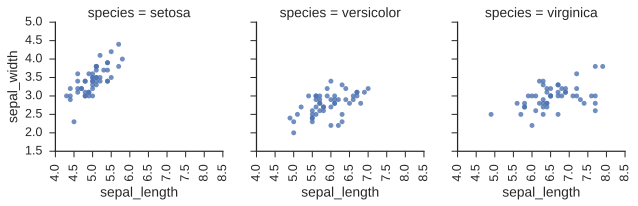

In [6]:
sepal_lmplot = sns.lmplot(data=iris, fit_reg=False, x="sepal_length", y="sepal_width", 
           col="species", scatter_kws={'s': 25}, size=3.05).set_xticklabels(rotation=90)

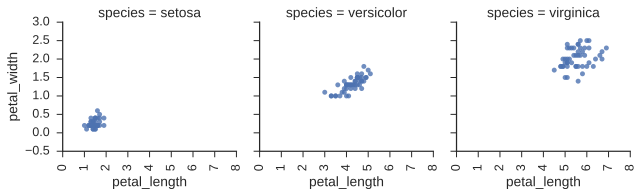

In [7]:
petal_lmplot = sns.lmplot(data=iris, fit_reg=False, x="petal_length", y="petal_width", 
           col="species", scatter_kws={'s': 25}, size=3.05).set_xticklabels(rotation=90)

### Categorical plots

#### [factorplot](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.factorplot.html#seaborn.factorplot)

`sns.factorplot(data=df, x="", y="")`

Really powerful and versatile.

Some parameters:

- `kind : {point, bar, count, box, violin, strip}`

In [8]:
planets = pd.read_csv("planets.csv", index_col=0)
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


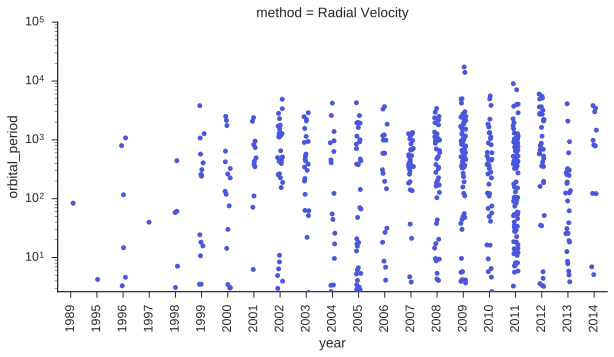

In [9]:
planets_factorplot = sns.factorplot(kind="strip", jitter=True, 
    data=planets[planets.method=="Radial Velocity"].sort_values(by="year"),
    col="method", x="year", y="orbital_period", color=sns.xkcd_rgb["warm blue"], 
    size=5, aspect=1.8)
_ = planets_factorplot.set_xticklabels(rotation=90).set(ylim=0, yscale="log")

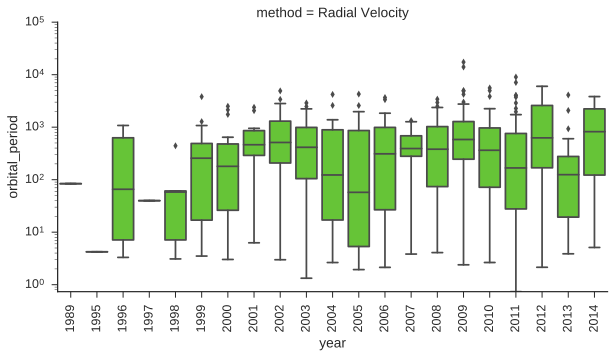

In [10]:
planets_factorplot = sns.factorplot(kind="box",  
    data=planets[planets.method=="Radial Velocity"].sort_values(by="year"),
    col="method", x="year", y="orbital_period", color=sns.xkcd_rgb["green apple"], 
    size=5, aspect=1.8)
_ = planets_factorplot.set_xticklabels(rotation=90).set(ylim=0, yscale="log")

### Matrix plots

#### [clustermap](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.clustermap.html#seaborn.clustermap)

Heatmap with clustering. Damn easy and beautiful

Some parameters:

- `z_score`: optional, Calculate z_score if specified.
- `{row,col}_cluster` : bool, optional. Whether to cluster by rows and columns. Enabled by default
- `{row,col}_colors` : list-like, optional. Useful to add colors to columns or rows and check whether stuff is clustering according to condition and stuff

In [11]:
tpm_filtered = pd.read_table("Heatmap.tsv", sep="\t", index_col=0)

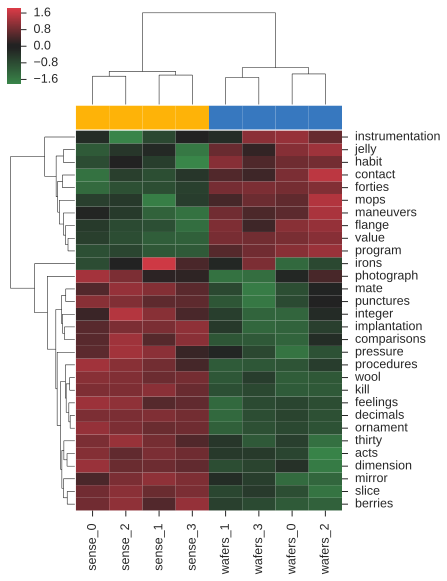

In [12]:
# Classic green and red colors for heatmap
cmap = sns.diverging_palette(133, 10, n=13, center="dark", as_cmap=True)

# Providing column colors. Awesome xkcd colors integration in seaborn
col_colors = [sns.xkcd_rgb["amber"]]*4 + [sns.xkcd_rgb["windows blue"]]*4

# Clustermap function
clustermap = sns.clustermap(tpm_filtered.sample(30), cmap=cmap, z_score=0,
                         figsize=(6,9), col_colors=col_colors)

# Just to set x axis ticks rotation to 0, by default it is 90
ax = clustermap.ax_heatmap
labels = ax.get_yticklabels()
_ = ax.set_yticklabels(labels, rotation=0)

## Color Palettes

Another very interesting and easy to use feature. Remember the xkcd color names, actually you can create a color palette from any list of colors. Just like you would do in `RColorBrewer` but pythonic.

#### `sns.set_palette`

Set the default palette to use for the subsequent plotting.

```python
sns.set_palette("Accent")
```

#### `sns.color_palette`

The function to create color palettes from colors and matplotlib cmaps

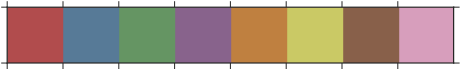

In [13]:
sns.palplot(sns.color_palette("Set1", n_colors=8, desat=.5))

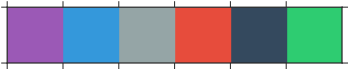

In [14]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))

There are a lot of color palette options from diverging, dark, light to custom. Explore and select what you like and be picky. After all, your plots define you ;)